# Crab Age Predictor - Regression Project

### Context
The dataset is used to estimate the age of the crab based on the physical attributes. Its a great starting point for classical regression analysis and feature engineering and understand the impact of feature engineering in Data Science domain.

### Content
Crab is very tasty and many countries of the world import huge amount of crabs for consumption every year. The main benefits of crab farming are, labor cost is very low, production cost is comparatively lower and they grow very fast. Commercial crab farming business is developing the lifestyle of the people of coastal areas. By proper care and management we can earn more from crab farming business than shrimp farming. You can raise mud crabs in two systems. Grow out farming and fattening systems.

Datasheet Columns: 

- Sex: Gender of the Crab - Male, Female and Indeterminate.
- Length: Length of the Crab (in Feet; 1 foot = 30.48 cms)
- Diameter: Diameter of the Crab (in Feet; 1 foot = 30.48 cms)
- Height: Height of the Crab (in Feet; 1 foot = 30.48 cms)
- Weight: Weight of the Crab (in ounces; 1 Pound = 16 ounces)
- Shucked Weight: Weight without the shell (in ounces; 1 Pound = 16 ounces)
- Viscera Weight: is weight that wraps around your abdominal organs deep inside body (in ounces; 1 Pound = 16 ounces)
- Shell Weight: Weight of the Shell (in ounces; 1 Pound = 16 ounces)
- Age: Age of the Crab (in months)

### Inspiration
For a commercial crab farmer knowing the right age of the crab helps them decide if and when to harvest the crabs. Beyond a certain age, there is negligible growth in crab's physical characteristics and hence, it is important to time the harvesting to reduce cost and increase profit. The goal of the dataset is:

Exploratory data analysis - Understand how different physical features change with age.
Feature Engineering - Define new features using a combination of given data points to help improve model accuracy.
Regression Model - Build a regression model to predict the age of the Crab.

In [114]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [115]:
df = pd.read_csv("CrabAgePrediction.csv")
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [117]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [118]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [119]:
df["Sex"].value_counts()

M    1435
I    1233
F    1225
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='Age'>

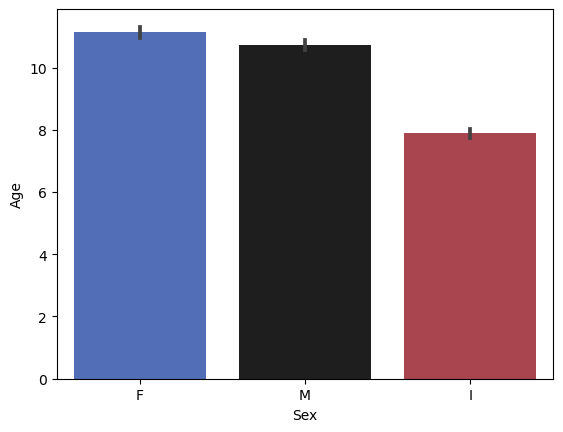

In [120]:
sns.barplot(df,x=df["Sex"],y=df["Age"],palette="icefire")

<Axes: xlabel='Sex', ylabel='Weight'>

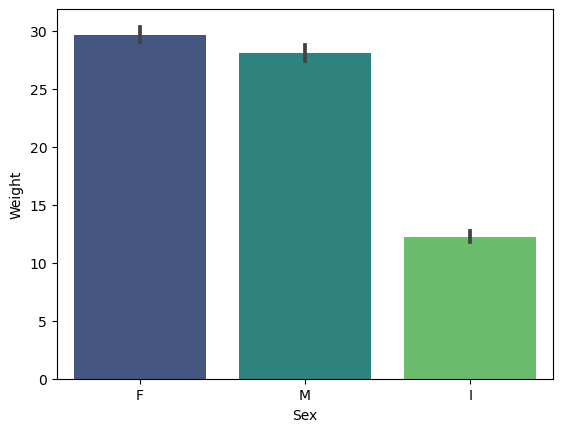

In [121]:
sns.barplot(df,x=df["Sex"],y=df["Weight"],palette="viridis")

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_46996/2732350774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

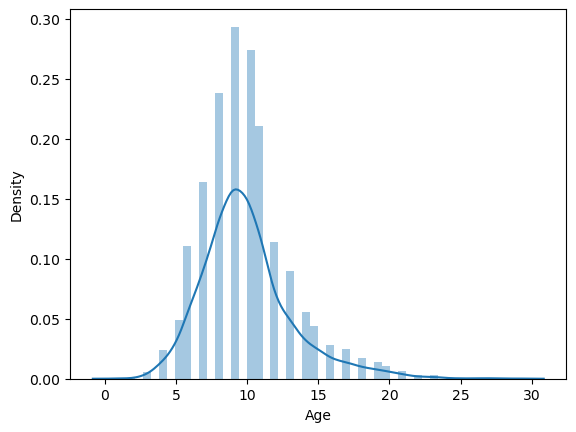

In [122]:
sns.distplot(df["Age"])

<Axes: xlabel='Weight', ylabel='Age'>

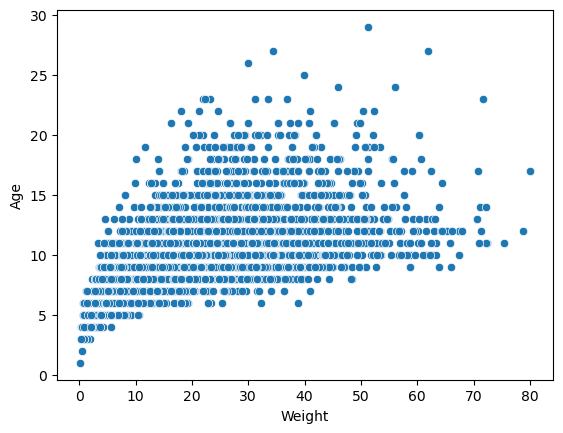

In [123]:
sns.scatterplot(df,x=df["Weight"],y=df["Age"])

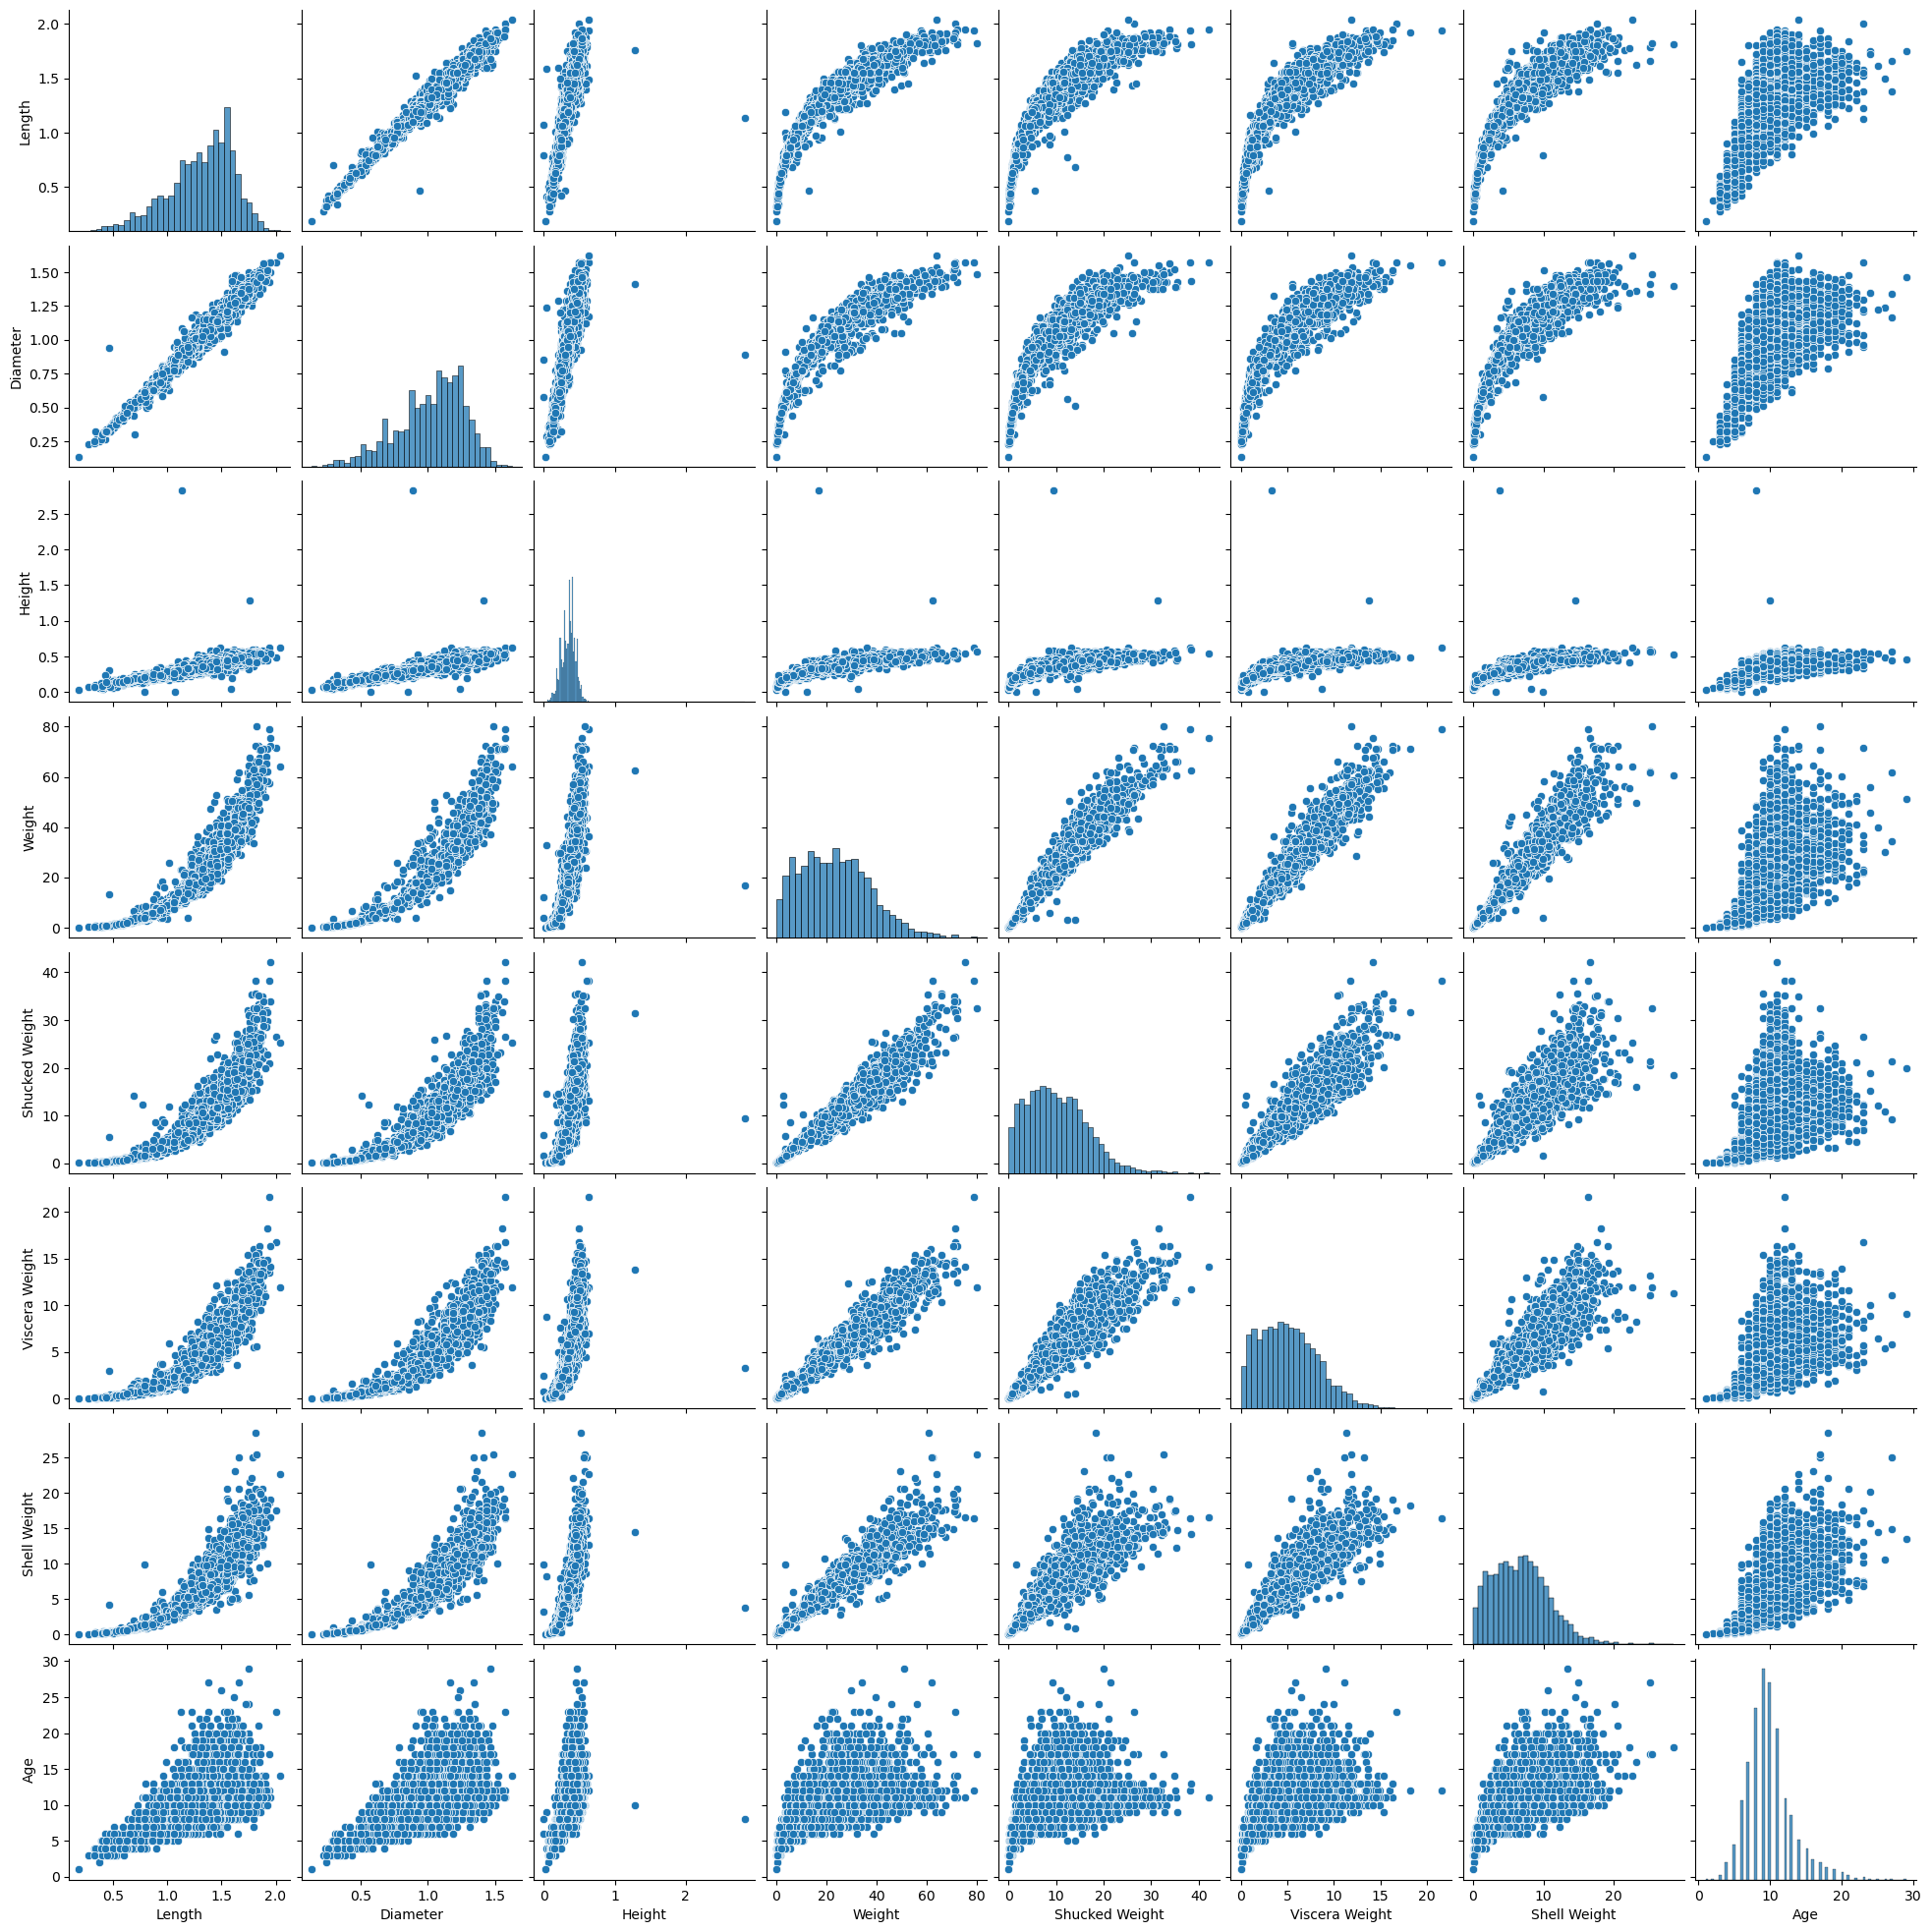

In [124]:
sns.pairplot(df)

In [125]:
df.corr()["Age"]

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_46996/4139125909.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Age"]


Length            0.554973
Diameter          0.573844
Height            0.551956
Weight            0.538819
Shucked Weight    0.418760
Viscera Weight    0.501328
Shell Weight      0.625195
Age               1.000000
Name: Age, dtype: float64

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_46996/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

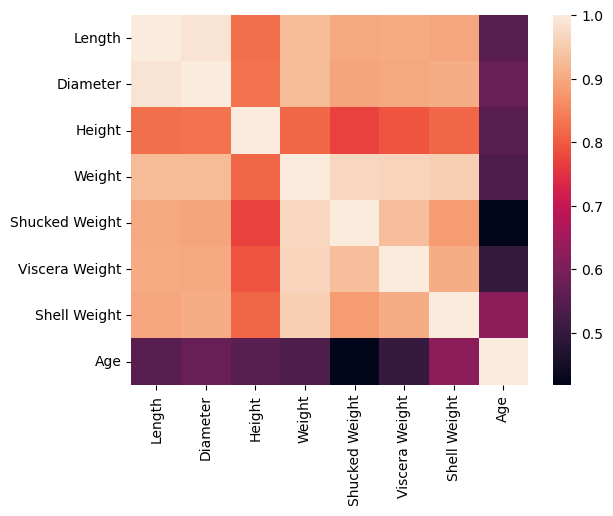

In [126]:
sns.heatmap(df.corr())

In [127]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [128]:
df = pd.get_dummies(df,columns=["Sex"],drop_first=True)

In [129]:
df

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,0
...,...,...,...,...,...,...,...,...,...,...
3888,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8,0,0
3889,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,0,0
3890,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,1,0
3891,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6,1,0


In [130]:
X = df.drop(columns="Age",axis = 1)
y = df["Age"]

In [131]:
X

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,1,0
...,...,...,...,...,...,...,...,...,...
3888,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,0,0
3889,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,0,0
3890,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,1,0
3891,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,1,0


In [132]:
y

0        9
1        6
2        6
3       10
4        6
        ..
3888     8
3889    10
3890     5
3891     6
3892     8
Name: Age, Length: 3893, dtype: int64

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [135]:
X_train.shape

(2725, 9)

In [136]:
X_test.shape

(1168, 9)

In [137]:
y_train.shape

(2725,)

In [138]:
y_test.shape

(1168,)

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

### Linear Regression Model

In [140]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [141]:
y_pred = lr.predict(X_test)

In [142]:
lr_r2 = r2_score(y_test,y_pred)
lr_r2

0.5419872760721027

In [143]:
lr_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
lr_rmse

2.0962633655357754

In [144]:
model_name = []
r2 = []
rmse_score = []
model_name.append("Linear Regression")
r2.append(lr_r2)
rmse_score.append(lr_rmse)

In [147]:
print(f"{model_name}")
print(f"{r2}")
print(f"{rmse_score}")


['Linear Regression']
[0.5419872760721027]
[2.0962633655357754]


In [188]:
rf = RandomForestRegressor(n_estimators = 200,max_samples=0.5,max_features=0.5,max_depth=15,random_state=12)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [189]:
rf_r2 = r2_score(y_test,y_pred_rf)

In [150]:
mean_absolute_error(y_test,y_pred_rf)

1.4560743215331053

In [153]:
rf_rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))

In [154]:
model_name.append("Random Forest Regression")
r2.append(rf_r2)
rmse_score.append(rf_rmse)

In [155]:
n_estimators = [50,100,150,200]

max_samples = [0.25,0.5,0.75,1]

max_features = [0.25,0.5,0.75,1]

max_depth = [2,5,8,15]
max_samples = [0.25,0.5,0.75,1]

param_grid = {
    "n_estimators":n_estimators,
    "max_samples":max_samples,
    "max_depth":max_depth,
    "max_features":max_features
    
}

In [156]:
from sklearn.model_selection import GridSearchCV

In [157]:
rf2 = RandomForestRegressor()

In [158]:
rf2_grid = GridSearchCV(estimator=rf2,param_grid=param_grid,n_jobs=-1)

In [159]:
rf2_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 15],
                         'max_features': [0.25, 0.5, 0.75, 1],
                         'max_samples': [0.25, 0.5, 0.75, 1],
                         'n_estimators': [50, 100, 150, 200]})

In [160]:
rf2_grid.best_params_

{'max_depth': 15,
 'max_features': 0.75,
 'max_samples': 0.25,
 'n_estimators': 200}

In [161]:
rf2_grid.best_score_

0.5404857296578

In [162]:
rf_3 = RandomForestRegressor(n_estimators = 200,max_samples=0.25,max_features=0.75,max_depth=15,random_state=12)
rf_3.fit(X_train,y_train)
y_pred_rf3 = rf_3.predict(X_test)


In [165]:
rf2_r2 = r2_score(y_test,y_pred_rf3)

In [166]:
rf2_rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf3))

In [167]:
model_name.append("Random Forest Regression with GridSearchCV")
r2.append(rf2_r2)
rmse_score.append(rf2_rmse)

In [168]:
from sklearn.preprocessing import PolynomialFeatures

In [170]:
r_2 = []

for i in range(1,5):
    poly = PolynomialFeatures(degree = i, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly.fit(X_train_poly,y_train)
    lr.fit(X_train_poly,y_train)
    y_pred_poly = lr.predict(X_test_poly)
    model_name.append(f"Polynomial Degree {i} (Not scaled) ")
    r2.append(r2_score(y_test,y_pred_poly))
    rmse_score.append(np.sqrt(mean_squared_error(y_test,y_pred_poly)))
    print(f"Degree: {i} R2_score: {r2_score(y_test,y_pred_poly)} RMSE: {np.sqrt(mean_squared_error(y_test,y_pred_poly))}")



Degree: 1 R2_score: 0.5419872760721027 RMSE: 2.0962633655357754
Degree: 2 R2_score: 0.5583087956996733 RMSE: 2.0585738351413094
Degree: 3 R2_score: 0.4997905349823941 RMSE: 2.1907005922608693
Degree: 4 R2_score: -271.1581401327843 RMSE: 51.09962784905556


In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [172]:
for i in range(1,5):
    poly = PolynomialFeatures(degree = i, include_bias=False)
    X_train_poly_scaled = poly.fit_transform(X_train_scaled)
    X_test_poly_scaled = poly.transform(X_test_scaled)
    poly.fit(X_train_poly_scaled,y_train)
    lr.fit(X_train_poly_scaled,y_train)
    y_pred_poly_scaled = lr.predict(X_test_poly_scaled)
    model_name.append(f"Polynomial Degree {i} (Scaled) ")
    r2.append(r2_score(y_test,y_pred_poly_scaled))
    rmse_score.append(np.sqrt(mean_squared_error(y_test,y_pred_poly_scaled)))
    print(f"Degree: {i} R2_score: {r2_score(y_test,y_pred_poly_scaled)} RMSE: {np.sqrt(mean_squared_error(y_test,y_pred_poly_scaled))}")
    


Degree: 1 R2_score: 0.5419872760721025 RMSE: 2.096263365535776
Degree: 2 R2_score: 0.5583213201688833 RMSE: 2.0585446487695447
Degree: 3 R2_score: 0.499790534992669 RMSE: 2.190700592238369
Degree: 4 R2_score: -271.1581407737205 RMSE: 51.099627909225724


In [173]:
xgb = XGBRegressor(n_estimators = 150,max_depth = 4, learning_rate= 0.1)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [174]:
xg_r2 = r2_score(y_test,y_pred_xgb)

In [175]:
xg_rmse = np.sqrt(mean_squared_error(y_test,y_pred_xgb))

In [176]:
model_name.append(f"XGBoost")
r2.append(xg_r2 )
rmse_score.append(xg_rmse)

In [177]:
print(model_name)
print(r2)
print(rmse_score)

['Linear Regression', 'Random Forest Regression', 'Random Forest Regression with GridSearchCV', 'Polynomial Degree 1 (Not scaled) ', 'Polynomial Degree 2 (Not scaled) ', 'Polynomial Degree 3 (Not scaled) ', 'Polynomial Degree 4 (Not scaled) ', 'Polynomial Degree 1 (Scaled) ', 'Polynomial Degree 2 (Scaled) ', 'Polynomial Degree 3 (Scaled) ', 'Polynomial Degree 4 (Scaled) ', 'XGBoost']
[0.5419872760721027, 0.5850576537109442, 0.5786204505094472, 0.5419872760721027, 0.5583087956996733, 0.4997905349823941, -271.1581401327843, 0.5419872760721025, 0.5583213201688833, 0.499790534992669, -271.1581407737205, 0.5686550952975822]
[2.0962633655357754, 1.9952666896573237, 2.010683899246799, 2.0962633655357754, 2.0585738351413094, 2.1907005922608693, 51.09962784905556, 2.096263365535776, 2.0585446487695447, 2.190700592238369, 51.099627909225724, 2.034320657556931]


In [178]:
eval_data = {
    "Model Name": model_name,
    "R2 Score": r2,
    "RMSE Score": rmse_score
} 

In [179]:
df_pred = pd.DataFrame(eval_data)

In [180]:
df_pred

,Model Name,R2 Score,RMSE Score
0,Linear Regression,0.541987,2.096263
1,Random Forest Regression,0.585058,1.995267
2,Random Forest Regression with GridSearchCV,0.578620,2.010684
3,Polynomial Degree 1 (Not scaled),0.541987,2.096263
4,Polynomial Degree 2 (Not scaled),0.558309,2.058574
5,Polynomial Degree 3 (Not scaled),0.499791,2.190701
6,Polynomial Degree 4 (Not scaled),-271.158140,51.099628
7,Polynomial Degree 1 (Scaled),0.541987,2.096263
8,Polynomial Degree 2 (Scaled),0.558321,2.058545
9,Polynomial Degree 3 (Scaled),0.499791,2.190701


In [186]:
df_pred.to_csv("Model Scores")

In [182]:
pred_data = {
    "Actual Age": y_test,
    "Predicted Age": y_pred_rf
}

In [183]:
df_pred_values = pd.DataFrame(pred_data)

In [184]:
df_pred_values

,Actual Age,Predicted Age
753,3,3.685000
3811,10,10.392886
657,10,11.693054
3710,6,6.694647
185,11,11.758999
...,...,...
313,8,9.771934
3152,11,8.552524
2391,7,6.788397
467,9,6.430869


In [187]:
df_pred_values.to_csv("Age_Predictions")

In [185]:
import pickle

In [190]:
pickle.dump(df,open("df.pkl","wb"))
pickle.dump(rf,open("rf.pkl","wb"))
